In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, normalize
from scipy import sparse
from scipy.sparse import hstack
from tqdm import tqdm

In [4]:
def read_sparse_dataset(dataset_name: str, *args, **kwargs) -> sparse.csr_matrix:
    with open(dataset_name, 'r') as f:
        num_lines = sum(1 for _ in f)

    sparse_row_list = []
    with open(dataset_name, 'r') as f:
        for row in tqdm(f, total=num_lines):
            data = np.fromstring(row, *args, **kwargs)
            sparse_row = sparse.csr_matrix(data)
            sparse_row_list.append(sparse_row)

    data_matrix: sparse.csr_matrix
    data_matrix = sparse.vstack(sparse_row_list)
    return data_matrix

Xy = read_sparse_dataset("training.csv", sep=',', dtype=np.int32)

100%|██████████| 12000/12000 [00:59<00:00, 202.54it/s]


In [6]:
aux_X = np.load("training_data.npz")

In [8]:
print(aux_X)

In [14]:
X: sparse.csr_matrix
y: np.ndarray
X = Xy[:, 1:-1]
y = Xy[:, -1].toarray()

In [9]:
# normalizing the data
X_norm: sparse.csr_matrix
X_norm = normalize(X)
y_cat = OneHotEncoder().fit_transform(y)

In [1]:
X_train_norm: sparse.csr_matrix
X_test_norm: sparse.csr_matrix
y_train_norm: np.ndarray
y_test_norm: np.ndarray

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_cat, test_size=0.2, random_state=42)

NameError: name 'sparse' is not defined

In [18]:
def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred), axis=1).mean()

def logisticRegression(X_train_norm, y_train_norm, eta=0.01, lmbda=0.1, itera=1000):
    m = X_train_norm.shape[0]
    k = y_train_norm.shape[0]
    n = X_train_norm.shape[1]
    X = hstack([sparse.csr_matrix(np.ones((m,1))), X_train_norm])
    delta = y_train_norm.T
    W = np.random.normal(loc=0, scale=0.01, size=(k, n+1))
    
    losses = []
    
    for iteration in tqdm(range(itera)):
        logits = scipy.sparse.linalg.expm(W @ X.T)
        probability = logits / scipy.sparse.csr_matrix.sum(logits, axis=0, keepdims=True)
        error = (delta - probability) @ X
        W = W + eta * (error - (lmbda * W))
        
        loss = cross_entropy_loss(delta.T, probability.T) + (lmbda / 2) * np.sum(W**2)
        losses.append(loss)
        
    return W, losses

In [21]:
W, losses = logisticRegression(X_train_norm, y_train_norm, eta=0.0000000025, lmbda=0.01, itera=10000)

: 

: 

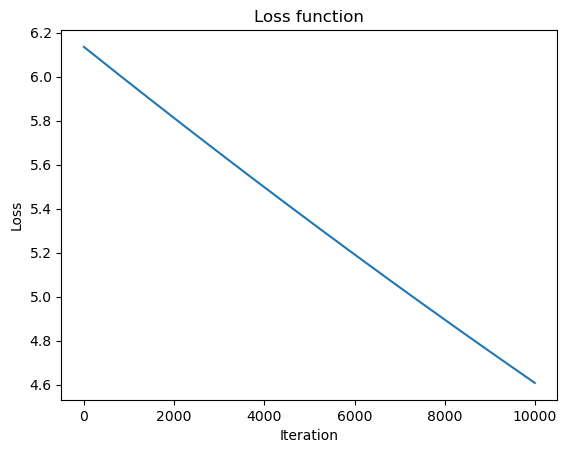

In [147]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss function')
plt.show()

In [142]:
def predict(W, X):
    m = X.shape[0]
    X = np.hstack((np.ones((m,1)), X))
    logits = np.exp(W @ X.T)
    probability = logits / np.sum(logits, axis=0)
    predictions = np.argmax(probability, axis=0)
    return predictions

In [148]:
np.mean(predict(W, xVal) == yVal)

0.05580808080808081